# Name: - L Prathyusha

# Analysis of the data 
https://www.kaggle.com/sahilk1610/imbalanced-dataset-pca-t-sne

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
train=pd.read_csv("C:/Users/Prathyu Lachireddy/Desktop/College Internship/Kenexoft/week 4/Participants_Data_WH18/Train.csv")
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("C:/Users/Prathyu Lachireddy/Desktop/College Internship/Kenexoft/week 4/Participants_Data_WH18/Test.csv")
test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train["Class"].value_counts()

0    1620
1     143
Name: Class, dtype: int64

(array([1620.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

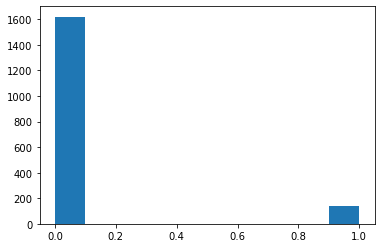

In [11]:
plt.hist(train["Class"])

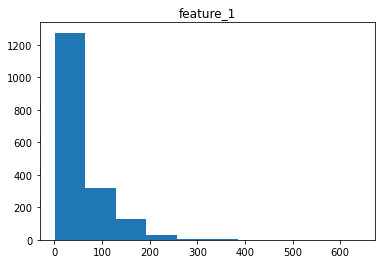

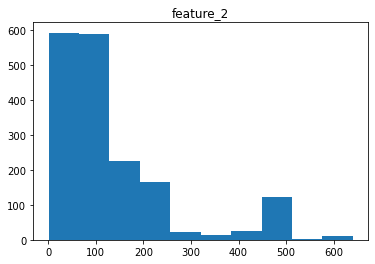

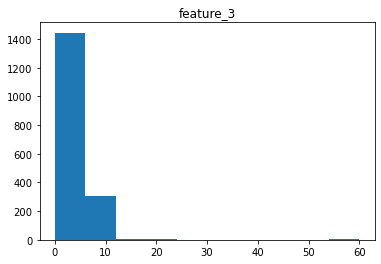

In [12]:
for i in train.columns[:3]:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

## Resampling the data

Here we will first remove a test set from our original Dataset and then resample our train dataset using SMOTE. This will give us a Datset which is untouched and on which we can test our final model. We will also create a validation dataset from our training to use cross validation techniques.

In [14]:
Sm = SMOTE()
X = train.drop("Class", axis = 1)
y = train["Class"]

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, stratify = y)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1586, 1558), (177, 1558), (1586,), (177,))

In [16]:
x_train, y_train = Sm.fit_resample(X_train, y_train)
x_train.shape, y_train.shape, y_train.value_counts()

((2914, 1558),
 (2914,),
 1    1457
 0    1457
 Name: Class, dtype: int64)

In [17]:
x_train_re, x_valid_re, y_train_re, y_valid_re = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [21]:
pca = PCA(n_components=3, random_state=52)
pca_result = pca.fit_transform(X)
train_copy = train.copy()
train_copy['pca-one'] = pca_result[:,0]
train_copy['pca-two'] = pca_result[:,1] 
train_copy['pca-three'] = pca_result[:,2]

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

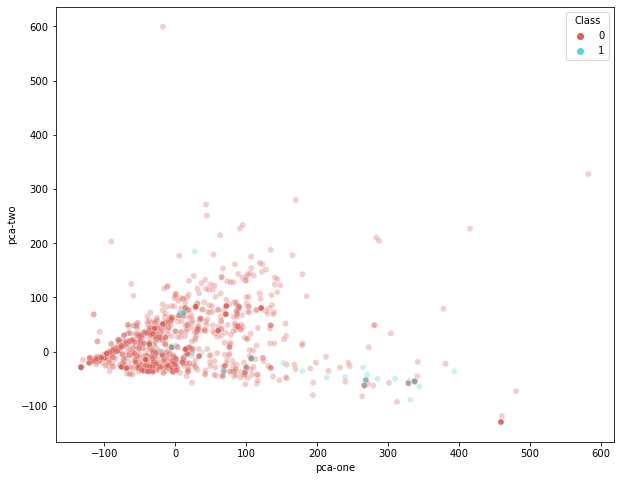

In [22]:
rndperm = np.random.permutation(train_copy.shape[0])
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data= train_copy.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

3D version of the above plot

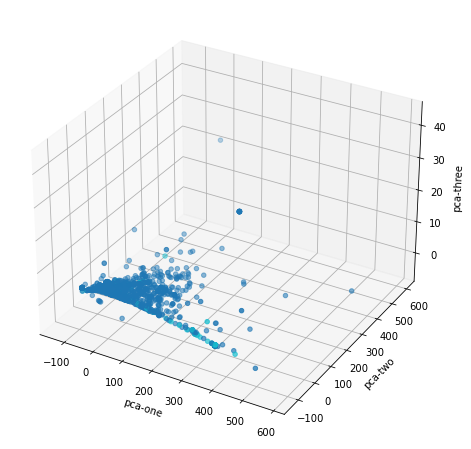

In [23]:
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(
    xs=train_copy.loc[rndperm,:]["pca-one"], 
    ys=train_copy.loc[rndperm,:]["pca-two"], 
    zs=train_copy.loc[rndperm,:]["pca-three"], 
    c=train_copy.loc[rndperm,:]["Class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [24]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1763 samples in 0.006s...
[t-SNE] Computed neighbors for 1763 samples in 0.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1763
[t-SNE] Computed conditional probabilities for sample 1763 / 1763
[t-SNE] Mean sigma: 2.357677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.631992
[t-SNE] KL divergence after 300 iterations: 0.629473


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

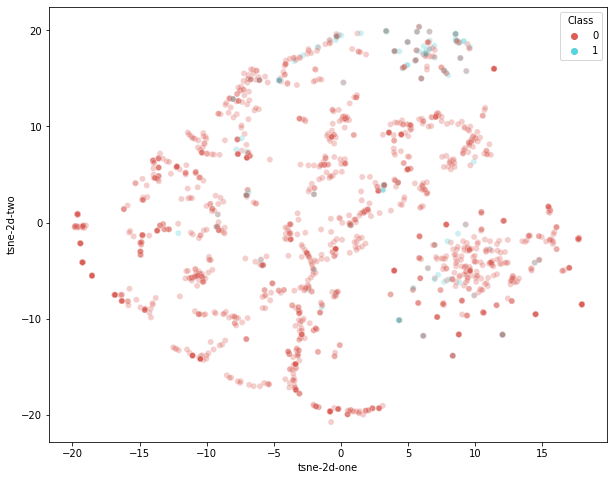

In [25]:
train_copy['tsne-2d-one'] = tsne_results[:,0]
train_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3
)

In [29]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.999763893971328


In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 17.072938680648804 seconds


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

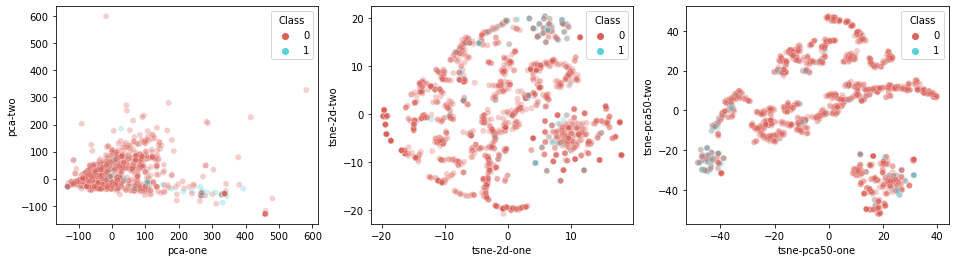

In [33]:
train_copy['tsne-pca50-one'] = tsne_pca_results[:,0]
train_copy['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=train_copy,
    legend="full",
    alpha=0.3,
    ax=ax3
)

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Class', ylabel='feature_3'>

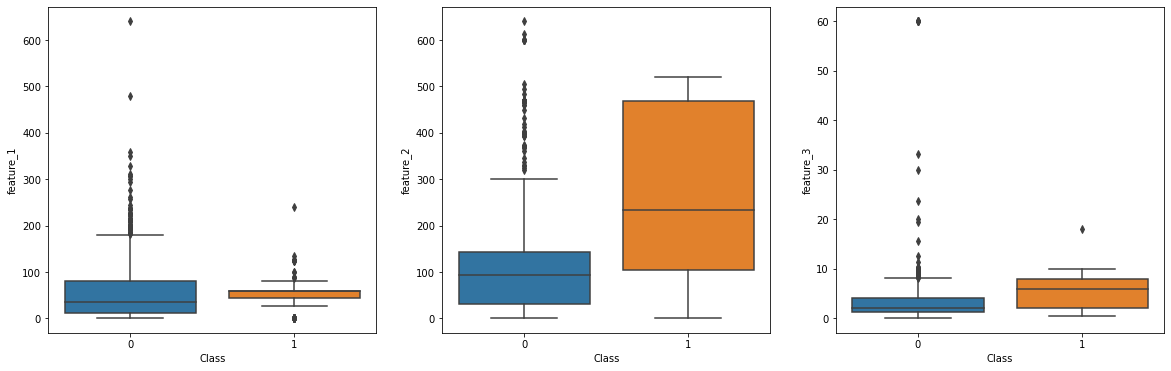

In [4]:
plt.rcParams['figure.figsize'] = 20,6
plt.subplot(131)
sns.boxplot(train["Class"], train["feature_1"])
plt.subplot(132)
sns.boxplot(train["Class"], train["feature_2"])
plt.subplot(133)
sns.boxplot(train["Class"], train["feature_3"])